In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [ ]:
insurance_dataset = pd.read_csv('/content/insurance.csv')
# we just imported insurance dataset into a pandas dataframe

In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# the features for which we're having object value , we'll do encoding for them as per the no. of different values they take
# let's check //

insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [ ]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
# we'll replace these objects with 0/1/2/3/4/5 and so on
# inplace=True helps in keeping the first replacements intact even after further replacements
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'no':0,'yes':1}},inplace=True)
insurance_dataset.replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3},inplace=True)

In [ ]:
# lets have an idea about the statistical parameters of the dataset \
insurance_dataset.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
# lets check for any missing values in the dataset
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# good
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
# Separating the target price and other features
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
# splitting the dataset into train and test sets
# and we'll do the data analysis or data visualising later
# we'll not include stratify=Y for obvious reasons .
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
# print(Y_test.shape)

(1070, 6)
(1070,)
(268, 6)


In [ ]:
# making and training the linear regression model
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
# checking r squared error on train data
train_data_prediction = model.predict(X_train)
train_data_error = metrics.r2_score(Y_train,train_data_prediction)
print('train data r squared error : ', train_data_error)

train data r squared error :  0.7518195459072954


In [ ]:
# checking r squared error on test data
test_data_prediction = model.predict(X_test)
test_data_error = metrics.r2_score(Y_test,test_data_prediction)
print('test data r squared error : ', test_data_error)

# Its obvious that this model a little overfitting one

test data r squared error :  0.7454471618659976


In [ ]:
# making a predictive system //
input_data = (22,1,39.805,0,0,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('prediction : ', prediction)

print('actual charge is : ',6571.02435)
print('Pretty close values , lets go!')

prediction :  [6946.93553745]
actual charge is :  6571.02435
Pretty close values , lets go!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

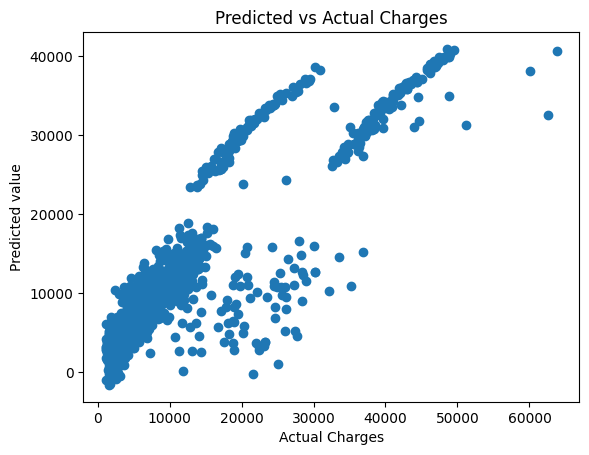

In [ ]:
# visualizing the data
plt.scatter(Y_train,train_data_prediction)
plt.title('Predicted vs Actual Charges')
plt.ylabel('Predicted value')
plt.xlabel('Actual Charges')
plt.show

<ipython-input-42-0239892c0893>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


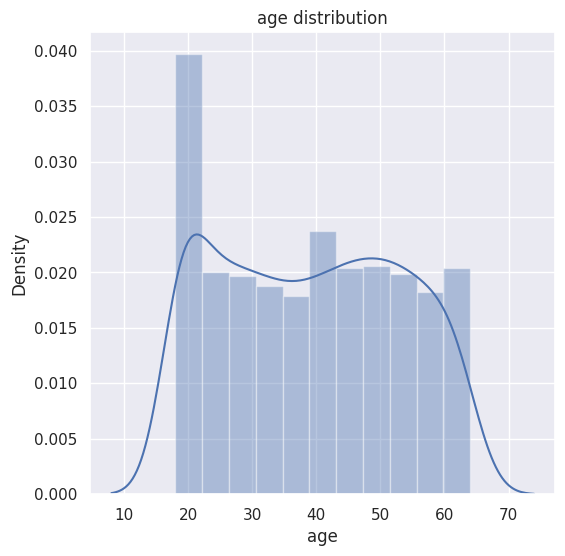

In [ ]:
# age distribution //
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()

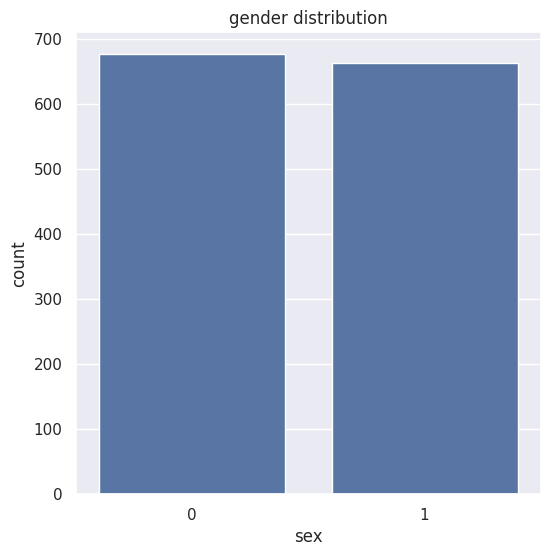

In [ ]:
# gender distribution //
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('gender distribution')
plt.show()

<ipython-input-44-5a57538804a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


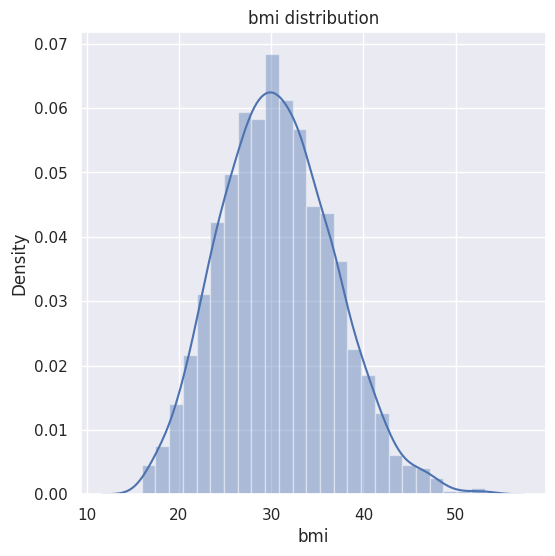

In [ ]:
# bmi distribution //
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

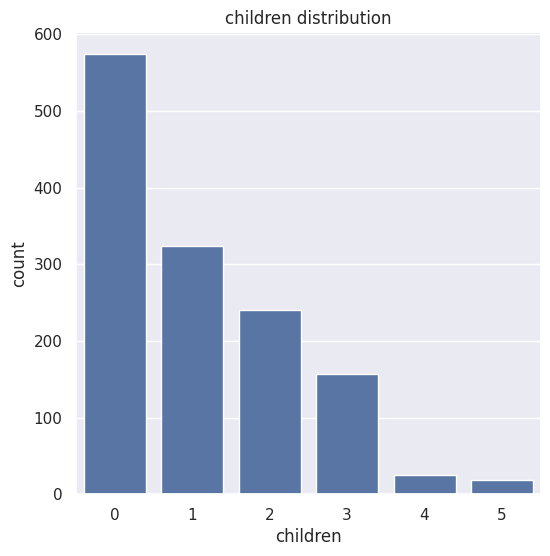

In [ ]:
# which shows that a no. of people are overweight as normal bmi range => 18.5-24.9

# children distribution //
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children distribution')
plt.show()

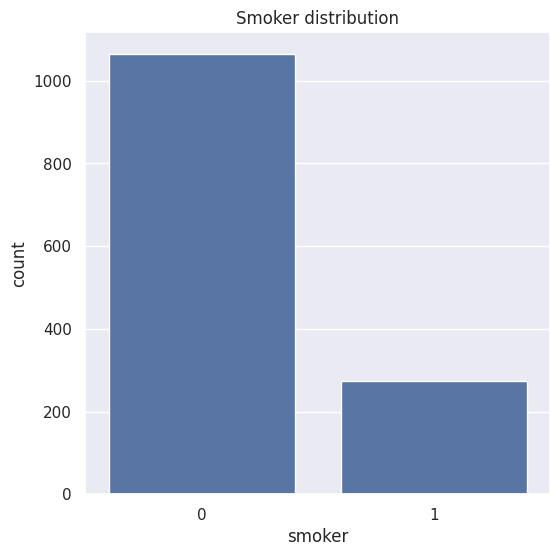

In [ ]:
# smoker distribution //
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker distribution')
plt.show()

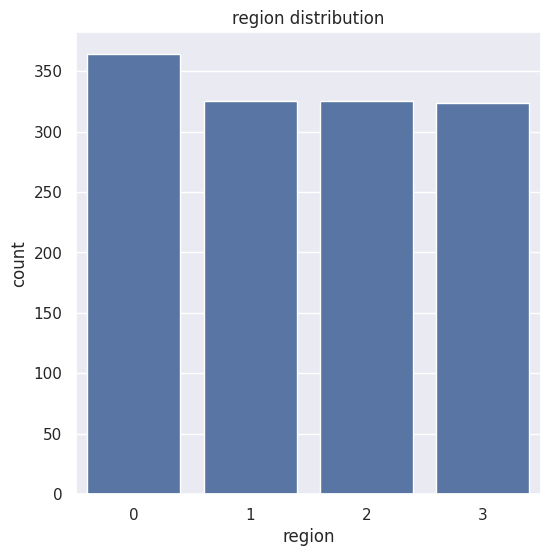

In [ ]:
# region distribution //
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region distribution')
plt.show()

<ipython-input-48-de261d64da34>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


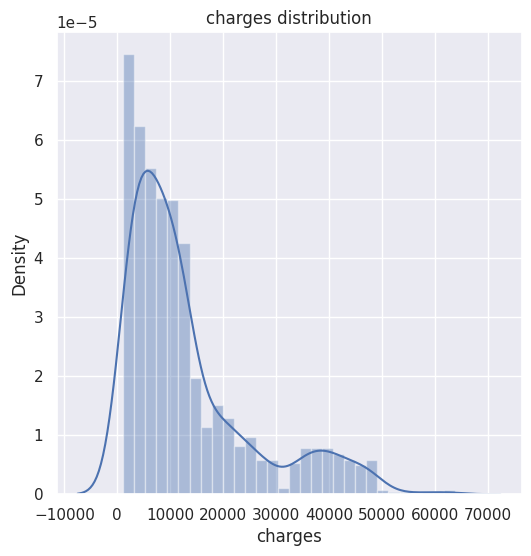

In [ ]:
# insurance charges distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

In [ ]:
print('20LPA+ pls')

20LPA+ pls
